<a href="https://colab.research.google.com/github/nabilera1/myColabNotebook/blob/main/7_5_%EC%97%B0%EA%B2%B0_%EB%A6%AC%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연결리스트
* 교재 : https://docs.google.com/document/d/1ihwOEyQGiyjcwx5vTHDVUmpEfqy7BEl3weiggKfUbHs/edit#

# NaN , Null, None 비교

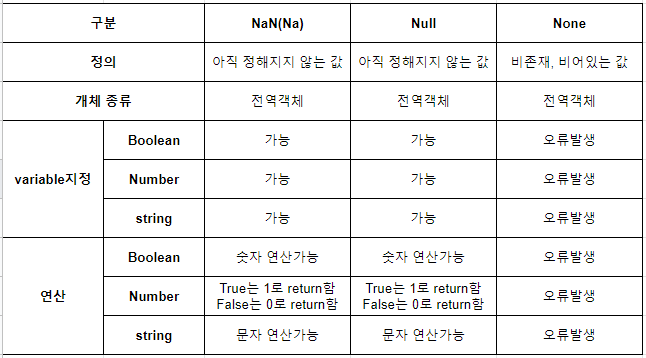

* None의 의미
* https://blog.naver.com/PostView.nhn?blogId=youndok&logNo=222085870181&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search

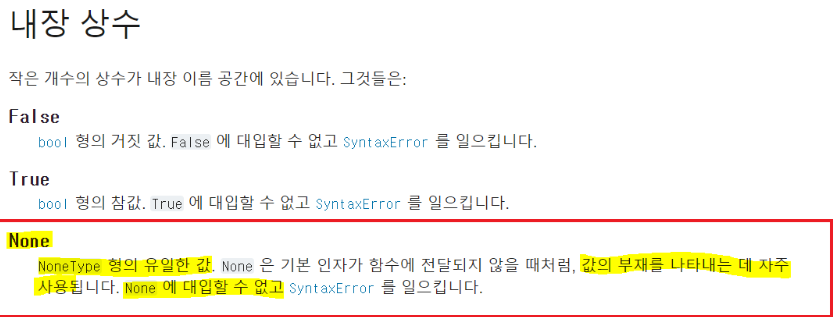

# 파이썬 자료

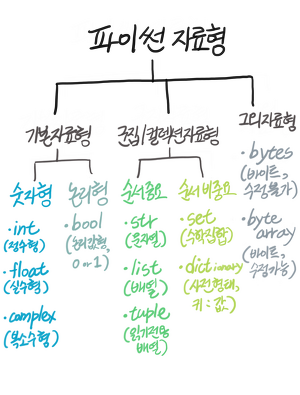

## class Node(object)

In [ ]:
#node.py 로 저장

class Node(object):
  def __init__(self, value = None, pointer = None):
    self.value = value
    self.pointer = pointer

  def getData(self):
    return self.value
  
  def getNext(self):
    return self.pointer

  def setData(self, newData):
    self.value = newData

  def setNext(self, newpointer):
    self.pointer = newpointer



In [ ]:
if __name__ == '__main__':
  L = Node('a', Node('b', Node('c', Node('d',))))

In [ ]:
L.pointer.value

'b'

In [ ]:
L.pointer.pointer.pointer.value

'd'

In [ ]:
assert(L.pointer.pointer.value == 'c')

In [ ]:
print(L.value)

a


In [ ]:
print(L.getData())

a


In [ ]:
L.getNext().getData()

'b'

In [ ]:
L.setData('aa')
L.setNext(Node('e'))
print(L.getData())
print(L.getNext().getData())

aa
e


In [ ]:
L.value

'aa'

In [ ]:
L.pointer.value

'e'

In [ ]:
# 접근할 수 없음.
L.pointer.pointer.value

AttributeError: ignored

# 링크드리스트로 스택 구현, 후입선출(LIFO) 연결리스트 구현
* 위 노드 활용
* linkedlist_LIFO.py

In [ ]:
from node import Node
# 코랩에서는 바로 사용할 수 없음.
# 이전 코드로 만들 파일을 업로드 하여 작성 가능

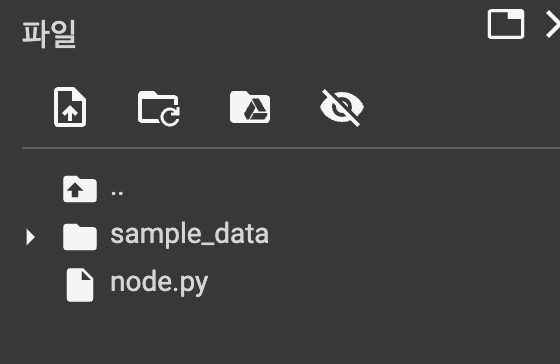

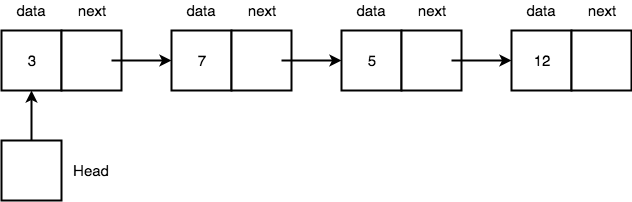

* 더미노드가 한개 있는 이중연결리스크 그림
* 헤드노드는 더미노드를 가리킴

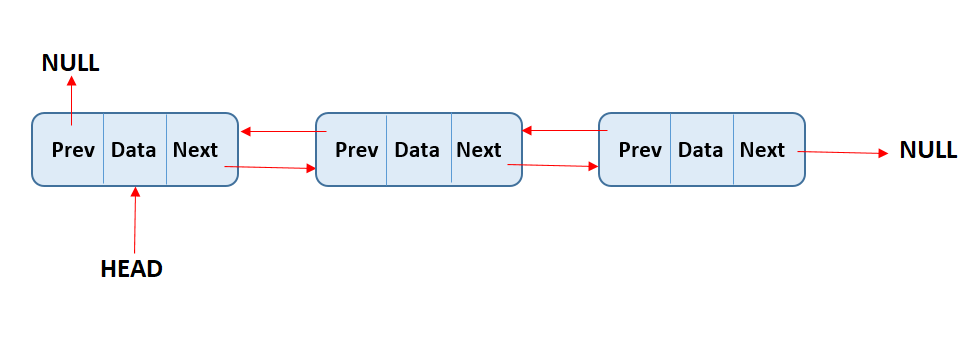

* 더미노드가 헤드 또는 더미노드가 없다고 표현할 수 있는 이중연결리스트 그림
* 헤드노드는 첫번째 노드를 가리킴

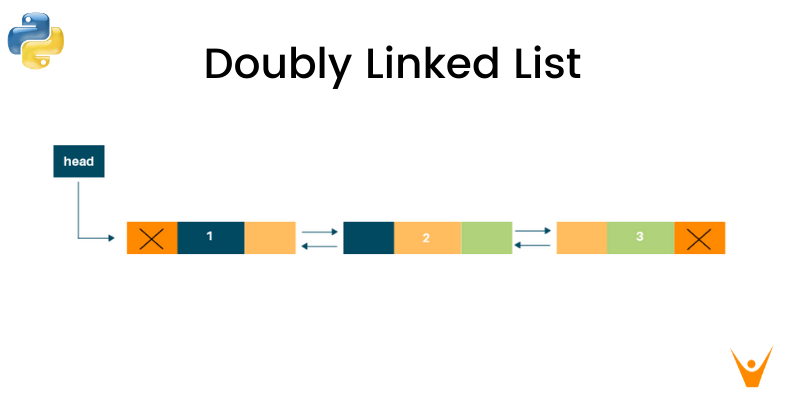

In [ ]:
# class LinkedListLIFO(object):
class LinkedListLIFO(Node): # 파일 분할 안할 시 상속으로 처리
  def __init__(self):
    self.head = None
    self.length = 0

  # 헤드부터 각 노드의 값을 출력
  def _printList(self):
    node = self.head
    while node:
      print(node.value, end=' ')
      node = node.pointer
    print()

  # 이전 노드를 기반으로 노드를 삭제한다.
  def _delete(self, prev, node):
    self.length = -1
    if not prev:
      self.head = node.pointer # None 아닌가?
    else:
      prev.pointer = node.pointer

  # add new Node
  def _add(self, value):
    self.length += 1
    self.head = Node(value, self.head)

  # find node by index
  def _find(self, index):
    prev = None
    node = self.head
    i = 0
    while node and i<index:
      prev = node
      node = node.pointer
      i += 1

    return node, prev, i

  # find node by value
  def _find_by_value(self, value):
    prev = None
    node = self.head
    found = False
    while node and not found:
      if node.value == value:
        found = True
      else:
        prev = node
        node = node.pointer
    return node, prev, found

  # 해당 인덱스의 노드 삭제하기
  def deleteNode(self, index):
    node, prev, i = self._find(index)
    if index == i:
      self._delete(prev, node)
    else:
      print(f'인덱스 {index}에 해당하는 노드가 없습니다.')
  
  # 값에 해당하는 노드를 찾아서 삭제한다.
  def deleteNodeByValue(self, value):
    node, prev, found = self._find_by_value(value)
    if found:
      self._delete(prev, node)
    else:
      print(f'값 {value}에 해당하는 노드가 없습니다.')

if __name__=='__main__':
  link = LinkedListLIFO()
  for i in range(1,5):
    link._add(i)
  print("Linked List :") 
  link._printList()


In [ ]:
for i in range(1,5):
  link._add(i)
print("Linked List :") 
link._printList()

Linked List :
4 3 2 1 


In [ ]:
print('인덱스가 2인 노드 삭제 후, 연결리스트 출력')
link.deleteNode(2)
link._printList()

인덱스가 2인 노드 삭제 후, 연결리스트 출력
4 3 1 


In [ ]:
print('값이 3인 노드 삭제 후, 연결 리스트 출력')
link.deleteNodeByValue(3)
link._printList()

값이 3인 노드 삭제 후, 연결 리스트 출력
4 1 


In [ ]:
print('값이 15일 노드 추가 후, 연결리스트 출력')
link._add(15)
link._printList()

값이 15일 노드 추가 후, 연결리스트 출력
15 4 1 


In [ ]:
print('값이 11일 노드 추가 후, 연결리스트 출력')
link._add(11)
link._printList()

값이 11일 노드 추가 후, 연결리스트 출력
11 15 4 1 


# linkedlistFIFO.py 구현

In [ ]:
# from node import Node
# class LinkedListFIFO(object):
class LinkedListFIFO(Node):
  def __init__(self):
    self.head = None
    self.length = 0
    self.tail = None

  def _printList(self):
    node = self.head
    while node:
      print(node.value, end=' ')
      node = node.pointer
    print()

  # 첫 번째 위치에 노드 추가
  def _addFirst(self, value):
    self.length = 1
    node = Node(value)
    self.head = node
    self.tail = node



  # 새 노드를 추가한다. 테일이 있다면, 테일의 다음 노드는
  # 새 노드를 가리키고, 테일은 새 노드를 가리킨다.

  def _add(self, value):
    self.length += 1
    node = Node(value)
    # if self.tail:
    #   self.tail.pointer = node
    self.tail.pointer = node
    self.tail = node

  def addNodeNew(self, value): # 내가 새로 만들어본 코드
    self.length += 1
    node = Node(value)
    if not self.head:
      self.head = node
      self.tail = node
    else:
      self.tail.pointer = node
      self.tail = node

  # 새 노드 추가
  def addNode(self, value):
    if not self.head:
      self._addFirst(value)
    else:
      self._add(value)

  # find node by index, 이전 코드와 동일
  def _find(self, index):
    prev = None
    node = self.head
    i = 0
    while node and i<index:
      prev = node
      node = node.pointer
      i += 1

    return node, prev, i

  # find node by value, 이전 코드와 동일
  def _find_by_value(self, value):
    prev = None
    node = self.head
    found = False
    while node and not found:
      if node.value == value:
        found = True
      else:
        prev = node
        node = node.pointer
    return node, prev, found


  def _deleteFirst(self):
    self.length = 0
    self.head = None
    self.tail = None
    print("연결리스트가 비었습니다.")


  # 인덱스에 해당하는 노드 삭제
  def deleteNode(self, index):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find(index)
      if i == index and node:
        self.length -= 1
        if i==0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print('인덱스 {}에 해당되는 노드가 없습니다.'.format(index))

  # 인덱스에 해당하는 노드 삭제, None
  def deleteNode1(self, index):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find(index)
      if i == index and node:
        self.length -= 1
        if i==0 or not prev:
          self.head = None
          self.tail = None
        else:
          prev.pointer = node.pointer
      else:
        print('인덱스 {}에 해당되는 노드가 없습니다.'.format(index))

  # 실습 과제, 통합 deleteNodeNew()를 만들고 다양한 실행결과를 통해
  # 오류가 없는 코드를 제출하시오.
  def deleteNodeNew(self, index):
    pass 

  # 값에 해당하는 노드 삭제
  def deleteNodeByValue(self, value):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find_by_value(value)
      if node and node.value == value:
        self.length -= 1
        if i==0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print('값 {}에 해당되는 노드가 없습니다.'.format(value))


In [ ]:
if __name__ == '__main__':
  link = LinkedListFIFO()
  for i in range(1, 5):
    link.addNode(i)
  print('연결리스트 출력')
  link._printList() # 1 2 3 4 

  print('인덱스 2인 노드 삭제 후, 연결리스트 출력:')
  link.deleteNode(2)
  link._printList() # 1 2 4

연결리스트 출력
1 2 3 4 
인덱스 2인 노드 삭제 후, 연결리스트 출력:
1 2 4 


In [ ]:
print('값이 15인 노드 추가 후, 연결리스트 출력')
link.addNode(15)
link._printList() #1 2 4 15 

for i in range(link.length - 1, -1, -1):
  link.deleteNode(i)
link._printList()

값이 15인 노드 추가 후, 연결리스트 출력
1 2 4 15 
연결리스트가 비었습니다.



## addNodeNew 사용한 것

In [ ]:
# if __name__ == '__main__':
  link = LinkedListFIFO()
  for i in range(1, 5):
    link.addNodeNew(i)
  print('연결리스트 출력')
  link._printList() # 1 2 3 4 

  print('인덱스 2인 노드 삭제 후, 연결리스트 출력:')
  link.deleteNode1(2)
  link._printList() # 1 2 4

연결리스트 출력
1 2 3 4 
인덱스 2인 노드 삭제 후, 연결리스트 출력:
1 2 4 


In [ ]:
print('값이 15인 노드 추가 후, 연결리스트 출력')
link.addNodeNew(15)
link._printList() #1 2 4 15 

for i in range(link.length - 1, -1, -1):
  link.deleteNode1(i)
link._printList()

값이 15인 노드 추가 후, 연결리스트 출력
1 2 4 15 
연결리스트가 비었습니다.



# 더미노드 활용 예시 C언어
* http://sjkitpro.blogspot.com/2018/07/linked-list-dummy.html

*  dummy 노드를 사용하지 않으면 head가 바로 첫 번째 노드를 가리킨다.
* dummy 노드를 사용하면 head는 dummy 노드를 가리킨다.

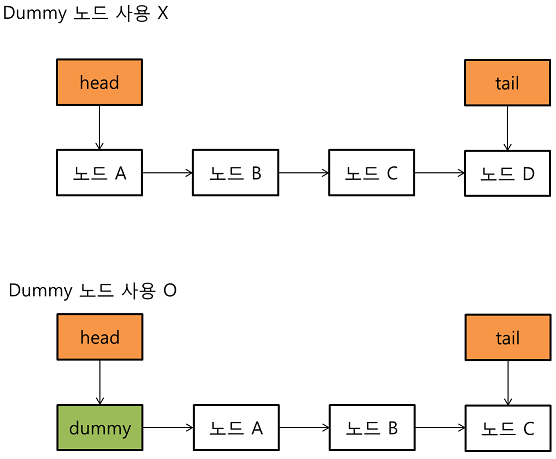

In [ ]:
# c언어
# 더미노드를 사용하지 않은 경우

Node * head;
Node * tail;

Node * newNode = (Node*)malloc(sizeof(Node));
newNode->data = data;
newNode->next = NULL;

if(head == NULL) // 첫 번째 노드를 삽입 할 때의 처리가 필요하다.
 head = newNode;
else 
 tail->next = newNode;

tail = newNode;

* c언어
* 더미노드를 사용한 경우

```
Node * head;
Node * tail;

head = (Node*)malloc(sizeof(Node));
tail = head;

Node * newNode = (Node*)malloc(sizeof(Node));
newNode->data = data;
newNode->next = NULL;

tail->next = newNode; // 첫 번째 노드인지 판단할 필요 없이 바로 추가.
tail = newNode;

```

* 추가 참고 자료
* https://www.crocus.co.kr/1179

# 더미노드 추가 설명
* 파이썬으로 연결리스트를 구현할 수 있을까? 정답은 Yes다. 포인터를 사용하지 않아도, 구조체를 사용하지 않아도 연결리스트를 구현할 수 있다. 일반적인 연결리스트, 더미 헤드를 사용하는 연결리스트, 더미 헤드와 더미 테일을 모두 사용하는 연결리스트 세 가지 종류를 설명한다. 여기서는 약간의 메모리를 더 사용하지만 가장 직관적이고 이해하기 쉬운 두 개의 더미 노드를 사용한 이중 연결리스트를 구현하고 설명한다.

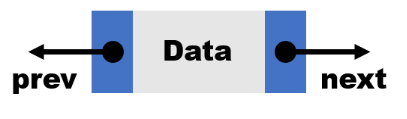

In [ ]:
class Node:
  def __init__(self):
    self.data = data
    self.prev = None
    self.next = None


# 자세한 내용은 다음 코랩 파일을 참고
* https://colab.research.google.com/drive/1C_kxJlDuKBUcQzqtFL4GuJ3uZdLwIt71#scrollTo=M8Qjf4tWAvs-